In [1]:
import matplotlib.pyplot as plot
# from demo import *
import pandas as pd
# from ilp import ilp
from sample import *

In [3]:
# plt_files=[]
import os
# threshold=1e6
plt=[]
for dir,_,plt_files in os.walk('data/Data/'):
    plt+=[os.path.join(dir,file) for file in plt_files]
threshold=1e6
df=pd.read_csv(plt[0],sep=',',names=['Latitude','Longitude','0','1','2','3','4'],skiprows=6)
point_set=np.array(df.loc[:,['Longitude','Latitude']].values.tolist())
point_set_size=point_set.shape[0]
for file in plt[1:]:
    df=pd.read_csv(file,sep=',',names=['Latitude','Longitude','0','1','2','3','4'],skiprows=6)
    df_points=np.array(df.loc[:,['Longitude','Latitude']].values.tolist())
    if df_points.shape==(0,):
        continue
    point_set=np.concatenate((point_set,df_points))
    point_set_size+=df_points.shape[0]
    if point_set_size>threshold:
        break
print(point_set_size)

1002131


In [4]:
valid_points=[]
for i in point_set:
    try:
        float_i=i.astype(float)
        valid_points.append(float_i)
    except:
        pass
valid_points=np.array(valid_points)
valid_points.shape

(1001183, 2)

In [5]:
prox=proximity(valid_points,set_eps=False)
prox.epsilon

3.2147064340016937e-07

In [2]:
df=pd.read_csv('data/Data/000/Trajectory/20081023025304.plt',sep=',',names=['Latitude','Longitude','0','1','2','3','4'],skiprows=6)
point_set_1=np.array(df.loc[:49,['Longitude','Latitude']].values.tolist())

In [11]:
max(point_set_1[:,0]),min(point_set_1[:,0])

(116.31845, 116.31033000000001)

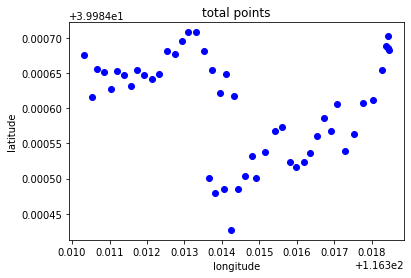

In [14]:
x=point_set_1[:,0]
y=point_set_1[:,1]

# plot.xlim(116.31,116)
# plot.figure(figsize=(20,10))
plot.xlabel('longitude')
plot.ylabel('latitude')
plot.title('total points')
plot.scatter(x,y,c='b')

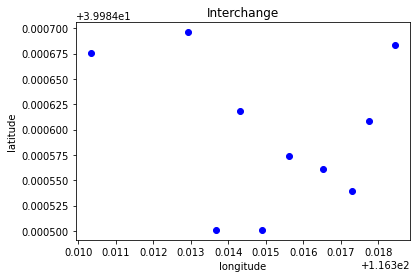

In [3]:
prox=proximity([])
int_generator=interchange(prox)
int_samples=int_generator.run(point_set_1,10)
# print(get_obj(int_samples,prox))

int_x=int_samples[:,0]
int_y=int_samples[:,1]
# plot.figure(figsize=(30,20))
# plot.xlim(116.28,116.34)


# plot.xlim(116.31,116)
# plot.figure(figsize=(20,10))
plot.xlabel('longitude')
plot.ylabel('latitude')
plot.title('Interchange')
plot.scatter(int_x,int_y,c='b')


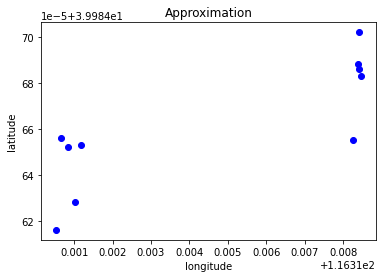

In [6]:
from dense import *
get_adj_mat(point_set_1,10)
get_heaps()
subgraph=dense_k(10)
dk_samples=point_set_1[list(subgraph)]
dk_x=dk_samples[:,0]
dk_y=dk_samples[:,1]
plot.xlabel('longitude')
plot.ylabel('latitude')
plot.title('Approximation')
plot.scatter(dk_x,dk_y,c='b')

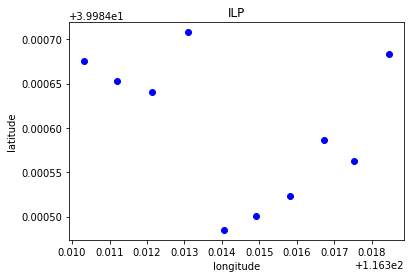

In [22]:
ilp_50=np.load('ilp_50.npy')[0]
ilp_x=ilp_50[:,0]
ilp_y=ilp_50[:,1]
# plot.figure(figsize=(30,20))
# plot.xlim(116.28,116.34)


# plot.xlim(116.31,116)
# plot.figure(figsize=(20,10))
plot.xlabel('longitude')
plot.ylabel('latitude')
plot.title('ILP')
plot.scatter(ilp_x,ilp_y,c='b')

In [20]:
ilp_50.shape

(1, 10, 2)

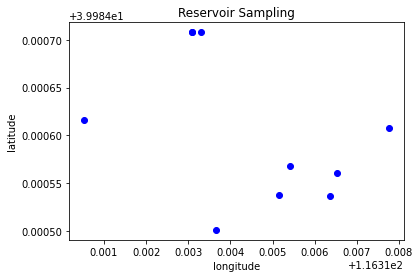

In [26]:
rd_sample=ReservoirSample(point_set_1,10)
# print(get_obj(rd_sample,prox))
rd_x=rd_sample[:,0]
rd_y=rd_sample[:,1]
# plot.figure(figsize=(30,20))
# plot.xlim(116.28,116.34)
plot.xlabel('longitude')
plot.ylabel('latitude')
plot.title('Reservoir Sampling')
plot.scatter(rd_x,rd_y,c='b')

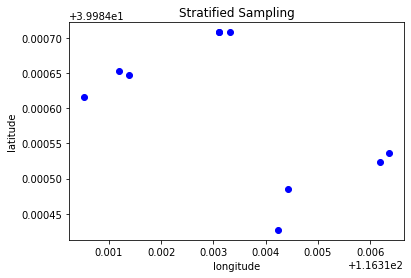

In [27]:
rd_sample=Stratified_sampling(point_set_1,10,5)
# print(get_obj(rd_sample,prox))
rd_x=rd_sample[:,0]
rd_y=rd_sample[:,1]
# plot.figure(figsize=(30,20))
# plot.xlim(116.28,116.34)
plot.xlabel('longitude')
plot.ylabel('latitude')
plot.title('Stratified Sampling')
plot.scatter(rd_x,rd_y,c='b')

stop_points/int_14788_30.npy
(500, 2)


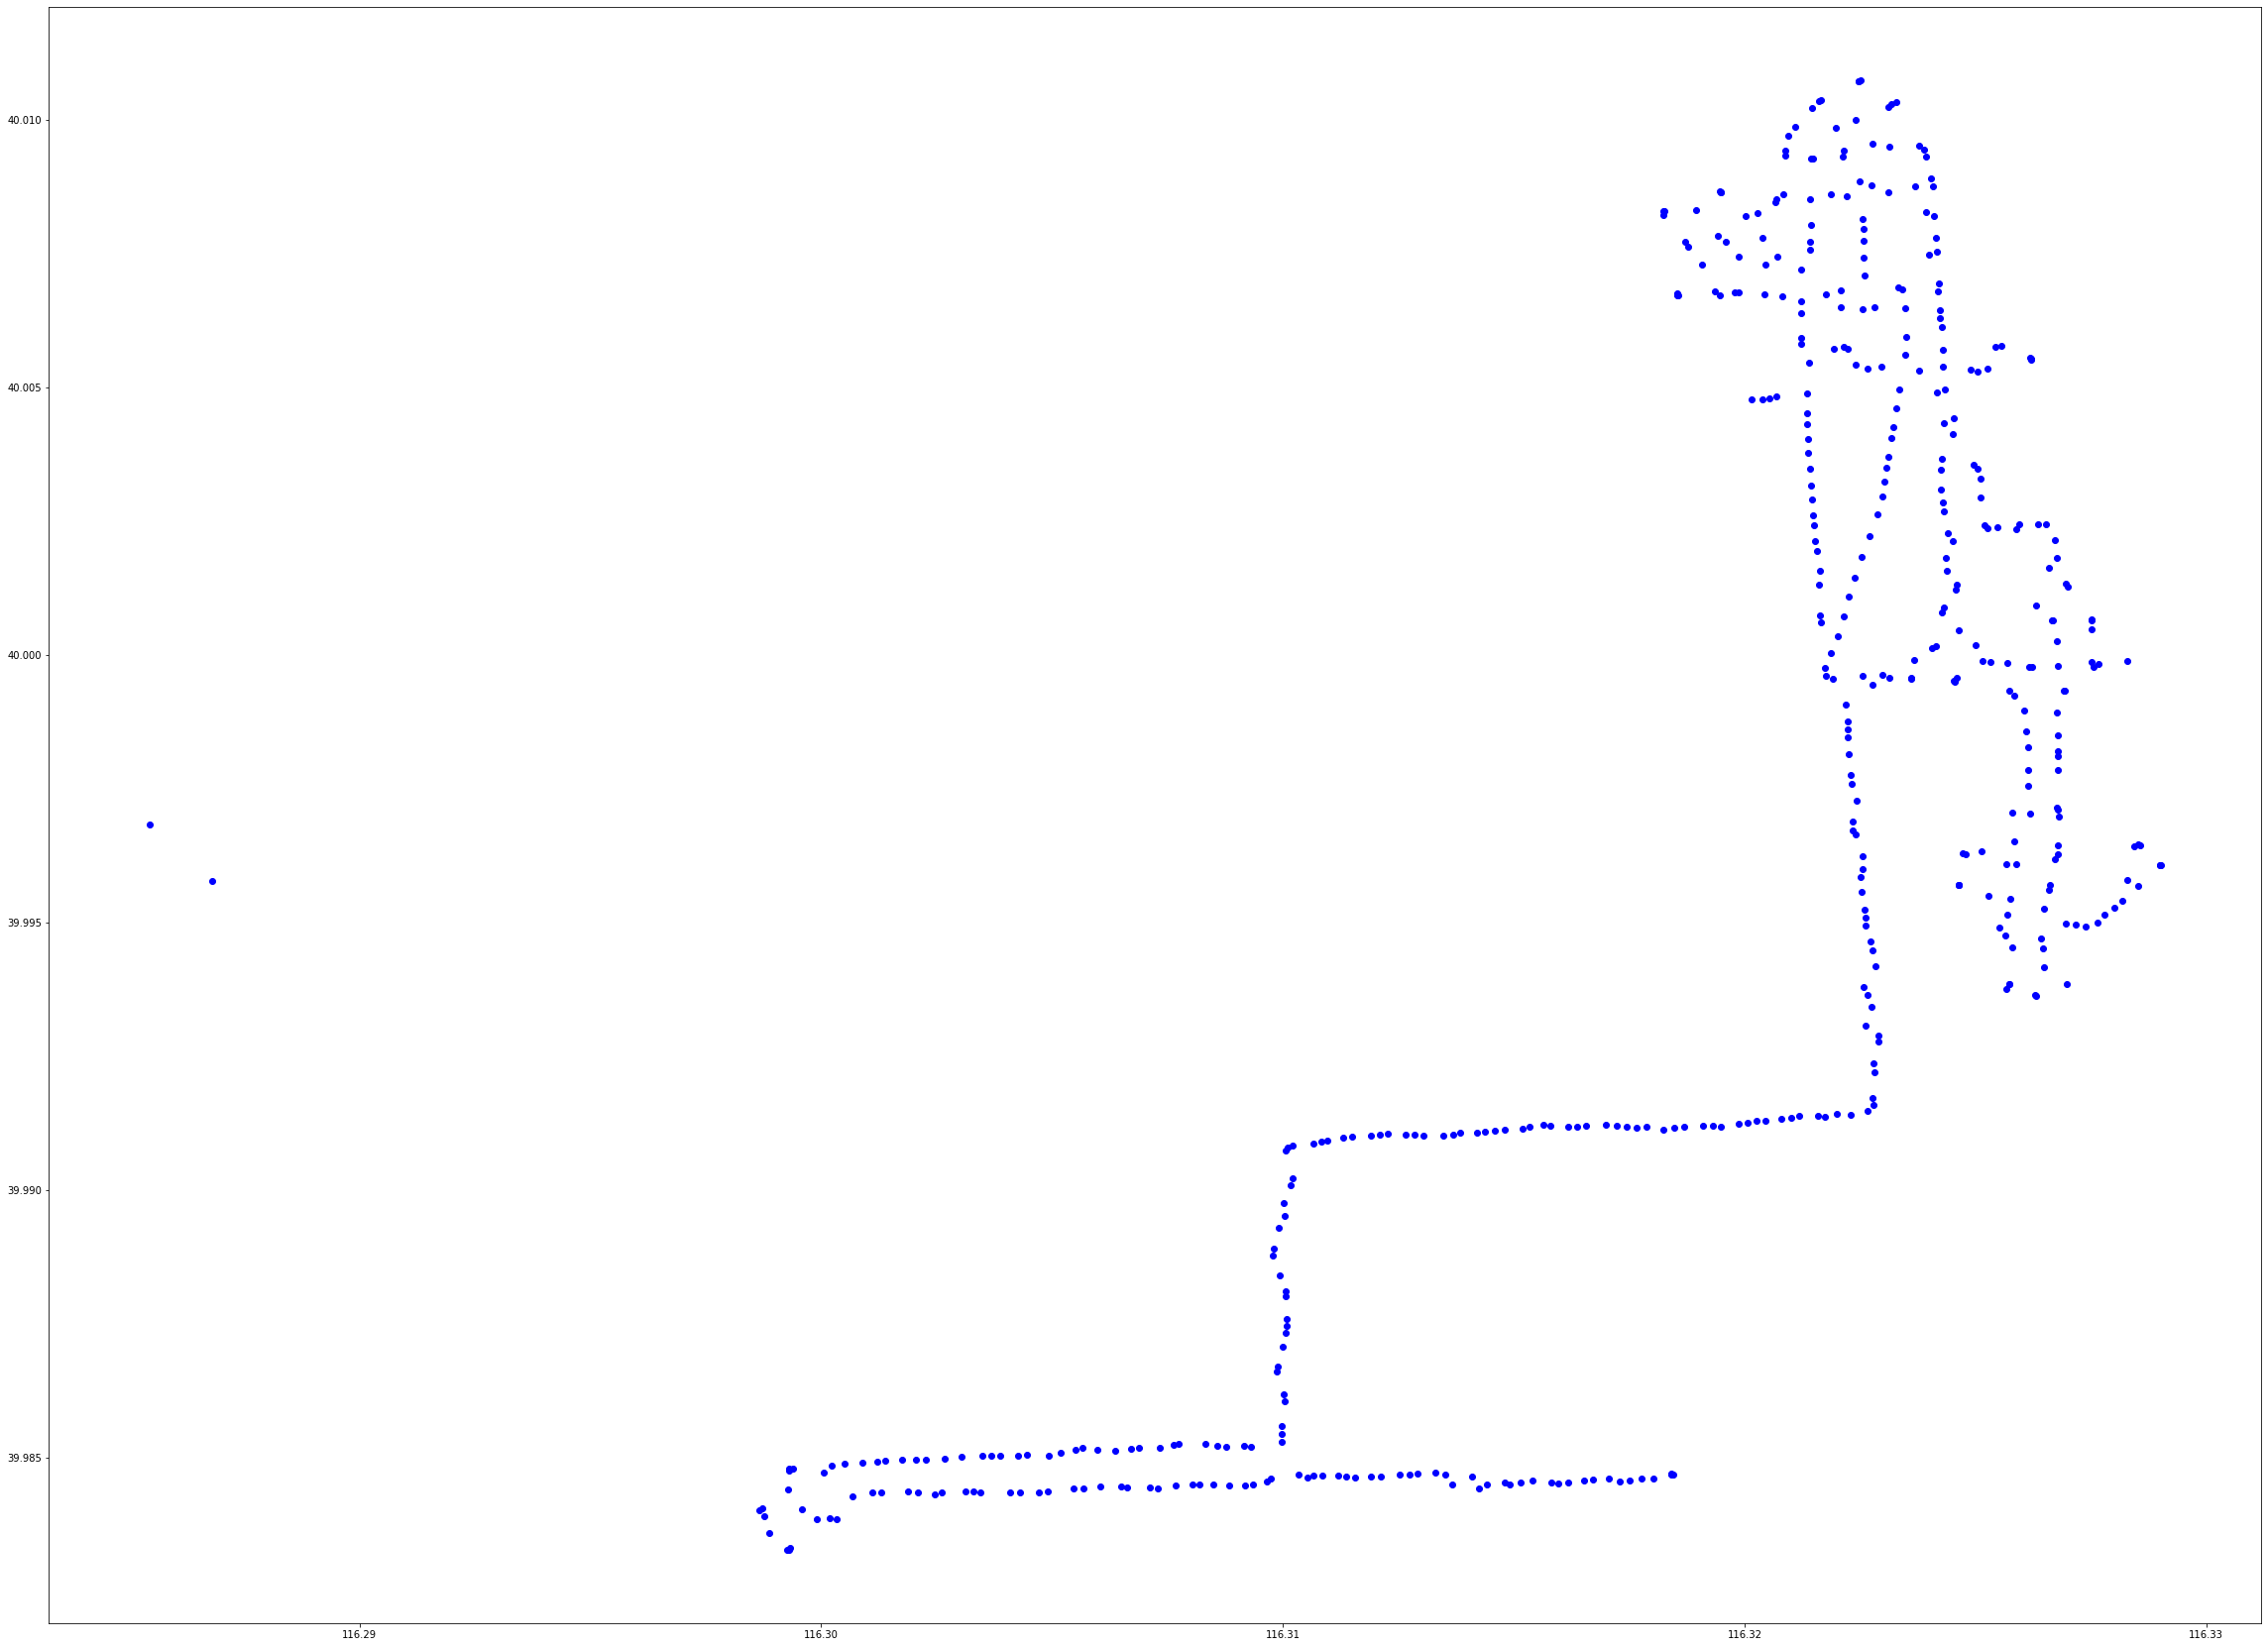

In [37]:
dir='stop_points/'
for record in os.listdir(dir)[4:5]:
    print(dir+record)
    # print(get_obj(points,1000))

    points=np.load(dir+record)
    print(points.shape)
    x=points[:,0]
    y=points[:,1]
    plot.figure(figsize=(40,30))
    plot.scatter(x,y,c='b')
    plot.show()    


In [8]:
# plt_files=[]
import os
plt_root_path='data/Data/000/Trajectory/'
threshold=10000
df=pd.read_csv('data/Data/000/Trajectory/20081023025304.plt',sep=',',names=['Latitude','Longitude','0','1','2','3','4'],skiprows=6)
point_set=np.array(df.loc[:,['Longitude','Latitude']].values.tolist())
point_set_size=point_set.shape[0]

for file in os.listdir(plt_root_path)[1:]:
    # print(file)
    df=pd.read_csv(plt_root_path+file,sep=',',names=['Latitude','Longitude','0','1','2','3','4'],skiprows=6)
    df_points=np.array(df.loc[:,['Longitude','Latitude']].values.tolist())
    point_set=np.concatenate((point_set,df_points))
    point_set_size+=df_points.shape[0]
    if point_set_size>threshold:
        break
print(len(point_set))

    

14788


In [10]:
get_adj_mat(point_set[:2000],100)
get_heaps()
subgraph=dense_k(100)
dk_samples=point_set[:2000][list(subgraph)]
dk_x=dk_samples[:,0]
dk_y=dk_samples[:,1]
print(get_obj(dk_samples,prox),dk_samples.shape)
# plot.scatter(dk_x,dk_y,c='b')

211.73 (100, 2)


In [ ]:
point_set.shape

In [6]:
point_set.shape

(14788, 2)

In [6]:
class interchange_timer:
    def __init__(self,prox:proximity) -> None:
        self.proximity=prox
    
    def expand(self,r,test_point):
        rsp=0
        for index,each in enumerate(r):
            rplc_point,rplc_rsp=each
            tmp_rsp=self.proximity.run(test_point,rplc_point)
            rplc_rsp+=tmp_rsp
            rsp+=tmp_rsp
            r[index]=(rplc_point,rplc_rsp)
        r.append((test_point,rsp))
        return r
    def max_rsp(self,r):
        rsp_max=0
        rsp_max_index=0
        for index,each in enumerate(r):
            point,rsp=each
            if rsp_max<rsp:
                rsp_max=rsp
                rsp_max_index=index
        return rsp_max_index
    def shrink(self,r):
        rsp_max_index=self.max_rsp(r)
        removed_point=r[rsp_max_index][0]
        del r[rsp_max_index]
        for index,each in enumerate(r):
            point,rsp=each
            rsp-=self.proximity.run(removed_point,point)
            r[index]=(point,rsp)
        return r
    def run(self,point_set,k,timeout,stop_points):
        # global pool
        pool=[]
        i=0
        idx=0
        set_size=point_set.shape[0]
        print(set_size)
        while i<stop_points:
            i+=1
            start=time.time()
            # for point in point_set:
            while idx<set_size:
                if time.time()-start>timeout:
                    print(time.ctime())
                    break
                point=point_set[idx]
                if len(pool)<k:
                    pool=self.expand(pool,point)
                else:
                    pool=self.expand(pool,point)
                    pool=self.shrink(pool)
                idx+=1
            print(idx,len(pool))
            s=[point[0] for point in pool] #(coordinates,responsibility) for each point in r
            np.save('stop_points/int_{}_{}_{}_{}.npy'.format(set_size,timeout,i,k),s)
            print('save {}th file'.format(i))
        return np.array(s)


In [19]:
import time
new=np.random.permutation(valid_points)
int_generator=interchange_timer(prox)
int_samples=int_generator.run(new[:int(1e6)],int(5000),3,12)
print(int_samples.shape)

1000000
Thu Apr  7 13:36:52 2022
737 737
save 1th file
Thu Apr  7 13:36:55 2022
1047 1047
save 2th file
Thu Apr  7 13:36:58 2022
1279 1279
save 3th file
Thu Apr  7 13:37:01 2022
1476 1476
save 4th file
Thu Apr  7 13:37:04 2022
1654 1654
save 5th file
Thu Apr  7 13:37:07 2022
1815 1815
save 6th file


KeyboardInterrupt: 

In [46]:
def get_obj(samples,prox):
    obj=0
    size=samples.shape[0]
    for i in range(size-1):
        for j in range(i+1,size):
            obj+=prox.run(samples[i],samples[j])    
            # obj+=proximity(samples[i],samples[j])
    return np.around(obj,2)

In [9]:
points=np.load('stop_points/int_1000000_3_2_1000.npy')
# prox=proximity(points)
# x=points[:,0]
# y=points[:,1]
# plot.figure(figsize=(30,20))
# plot.xlim(116.29,116.81)
# plot.scatter(x,y,c='b')
print(get_obj(points,prox),points.shape)
# obj=get_obj(points,prox)
# sum=0
# for i in obj:
#     if i>1:
#         print(i)
#         break
#     sum+=i
# print(sum,len(obj))


706.94 (1000, 2)


In [11]:
start=time.time()
rd_sample=ReservoirSample(valid_points[:int(1e6)],1000)
print(time.time()-start)
print(get_obj(rd_sample,prox))
# rd_x=rd_sample[:,0]
# rd_y=rd_sample[:,1]
# plot.figure(figsize=(30,20))
# plot.xlim(116.28,116.34)
# plot.scatter(rd_x,rd_y,c='b')

1.0957763195037842
781.65


In [12]:
start=time.time()
st=Stratified_sampling(valid_points[:int(1e6)],1000)
print(time.time()-start)
print(get_obj(st,prox))

1.1086583137512207
708.09


In [13]:
obj_6=[]
for i in range(6):
    points=np.load('stop_points/int_1000000_3_{}_1000.npy'.format(i+1))
    # prox=proximity(points)
    x=points[:,0]
    y=points[:,1]
    obj_6.append(get_obj(points,prox))    
    print(i+1)
obj_6

1
2
3
4
5
6


[451.98, 706.94, 131.68, 21.86, 1.02, 0.0]

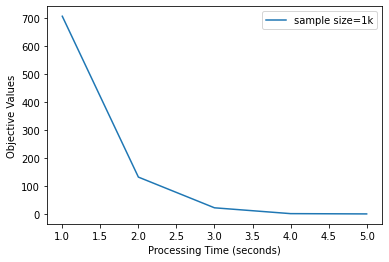

In [22]:
x=[i for i in range(1,6)]
y=[451.98, 706.94, 131.68, 21.86, 1.02, 0.0]
plot.xlabel('Processing Time (seconds)')
plot.ylabel('Objective Values')
# plot.title('')
plot.plot(x,y[1:6],label='sample size=1k')
plot.legend()
plot.show()

In [18]:
obj_6_10000=[]
for i in range(12):
    points=np.load('stop_points/int_1000000_3_{}_5000.npy'.format(i+1))
    # prox=proximity(points)
    x=points[:,0]
    y=points[:,1]
    obj_6_10000.append(get_obj(points,prox))    
    print(i+1)
obj_6_10000

1
2
3
4
5
6
7
8
9
10
11
12


[386.31,
 732.95,
 1123.02,
 1446.96,
 1738.54,
 2076.42,
 2499.19,
 2862.61,
 3150.7,
 3357.27,
 3747.61,
 4121.12]

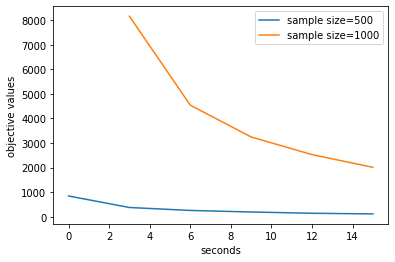

In [35]:
x_500=[i*3 for i in range(6)]
y_500=obj_6
x_1000=[i*3 for i in range(1,6)]
y_1000=obj_6_1000[1:]
# plot.plot(x,y)
plot.plot(x_500, y_500, label = "sample size=500")
plot.plot(x_1000, y_1000, label = "sample size=1000")
plot.xlabel('running time')
plot.ylabel('objective values')
plot.legend()
plot.show()

In [19]:
print(max(point_set[:,0]),min(point_set[:,0]))
# print(max(point_set[:,1]),min(point_set[:,1]))

116.80200500000001 116.30578200000001
40.021469 39.906638


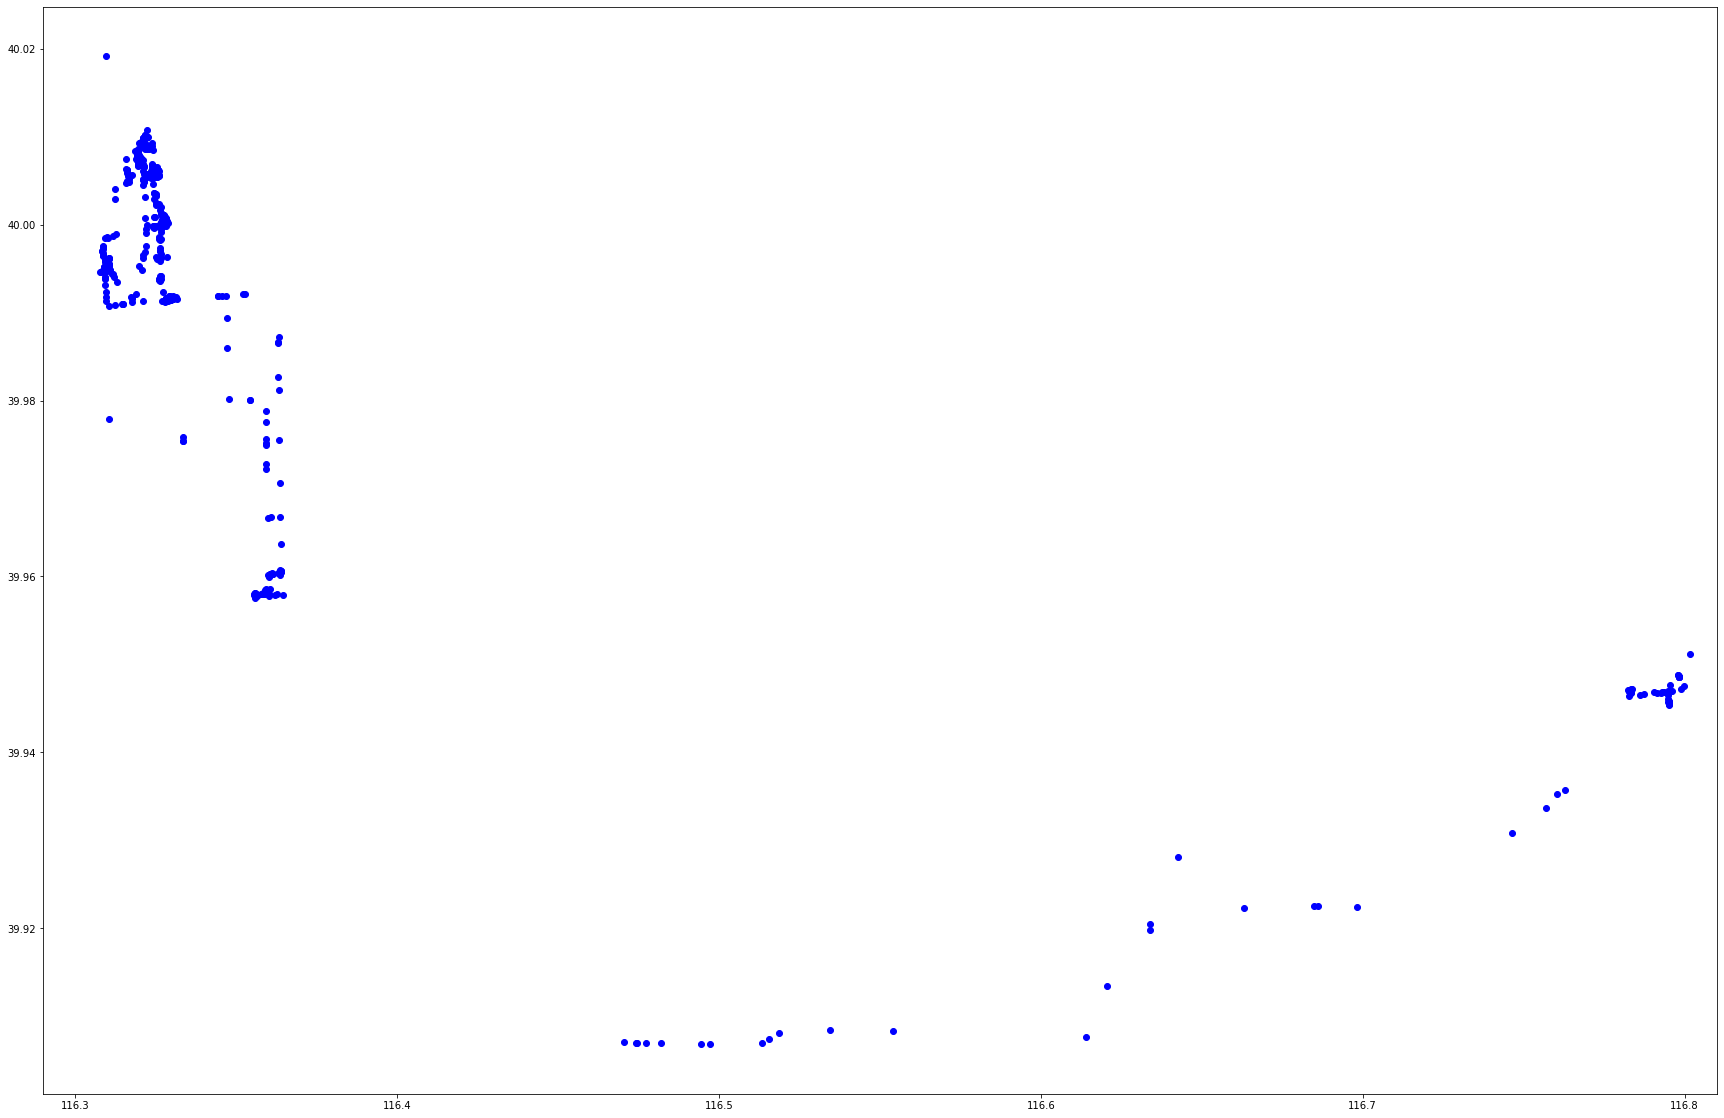

In [25]:
points=np.load('stop_points/int_10000_3_1.npy')
prox=proximity(points)
x=points[:,0]
y=points[:,1]
plot.figure(figsize=(30,20))
plot.xlim(116.29,116.81)
plot.scatter(x,y,c='b')
# print(get_obj(points,prox),points.shape)

In [3]:
# point_set=np.array(df.loc[:29,['Longitude','Latitude']].values.tolist())
prox=proximity(point_set,set_eps=False)
sample_size=100

In [4]:
prox.epsilon

1.8988414569991985e-07

In [46]:
ilp_sample=np.load('ilp_50.npy')

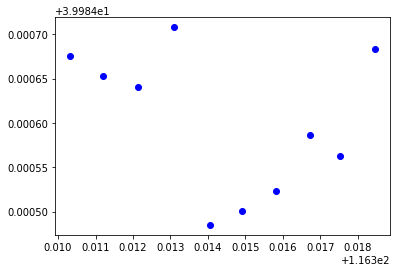

In [47]:
ilp_x=ilp_sample[0][:,0]
ilp_y=ilp_sample[0][:,1]
plot.scatter(ilp_x,ilp_y,c='b')

2.49


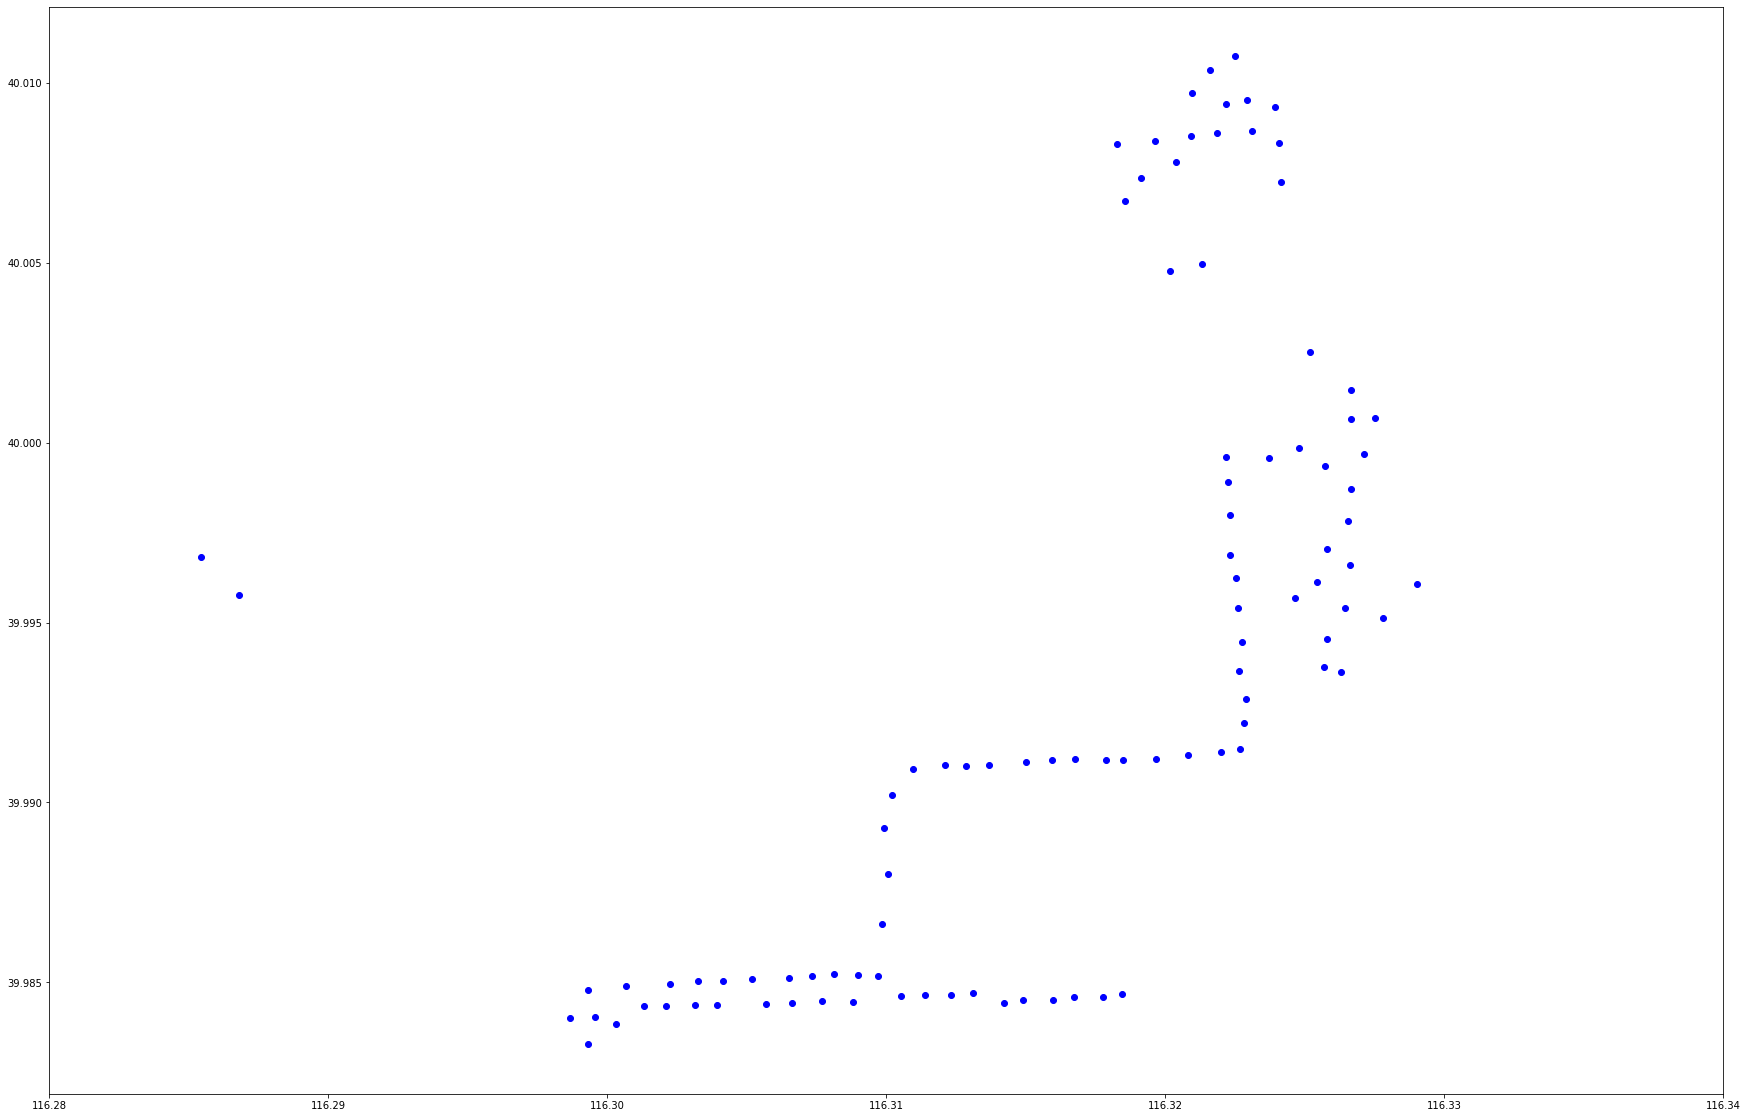

In [5]:
int_generator=interchange(prox)
int_samples=int_generator.run(point_set[:2000],sample_size)
print(get_obj(int_samples,prox))

int_x=int_samples[:,0]
int_y=int_samples[:,1]
plot.figure(figsize=(30,20))
plot.xlim(116.28,116.34)
plot.scatter(int_x,int_y,c='b')

4.96


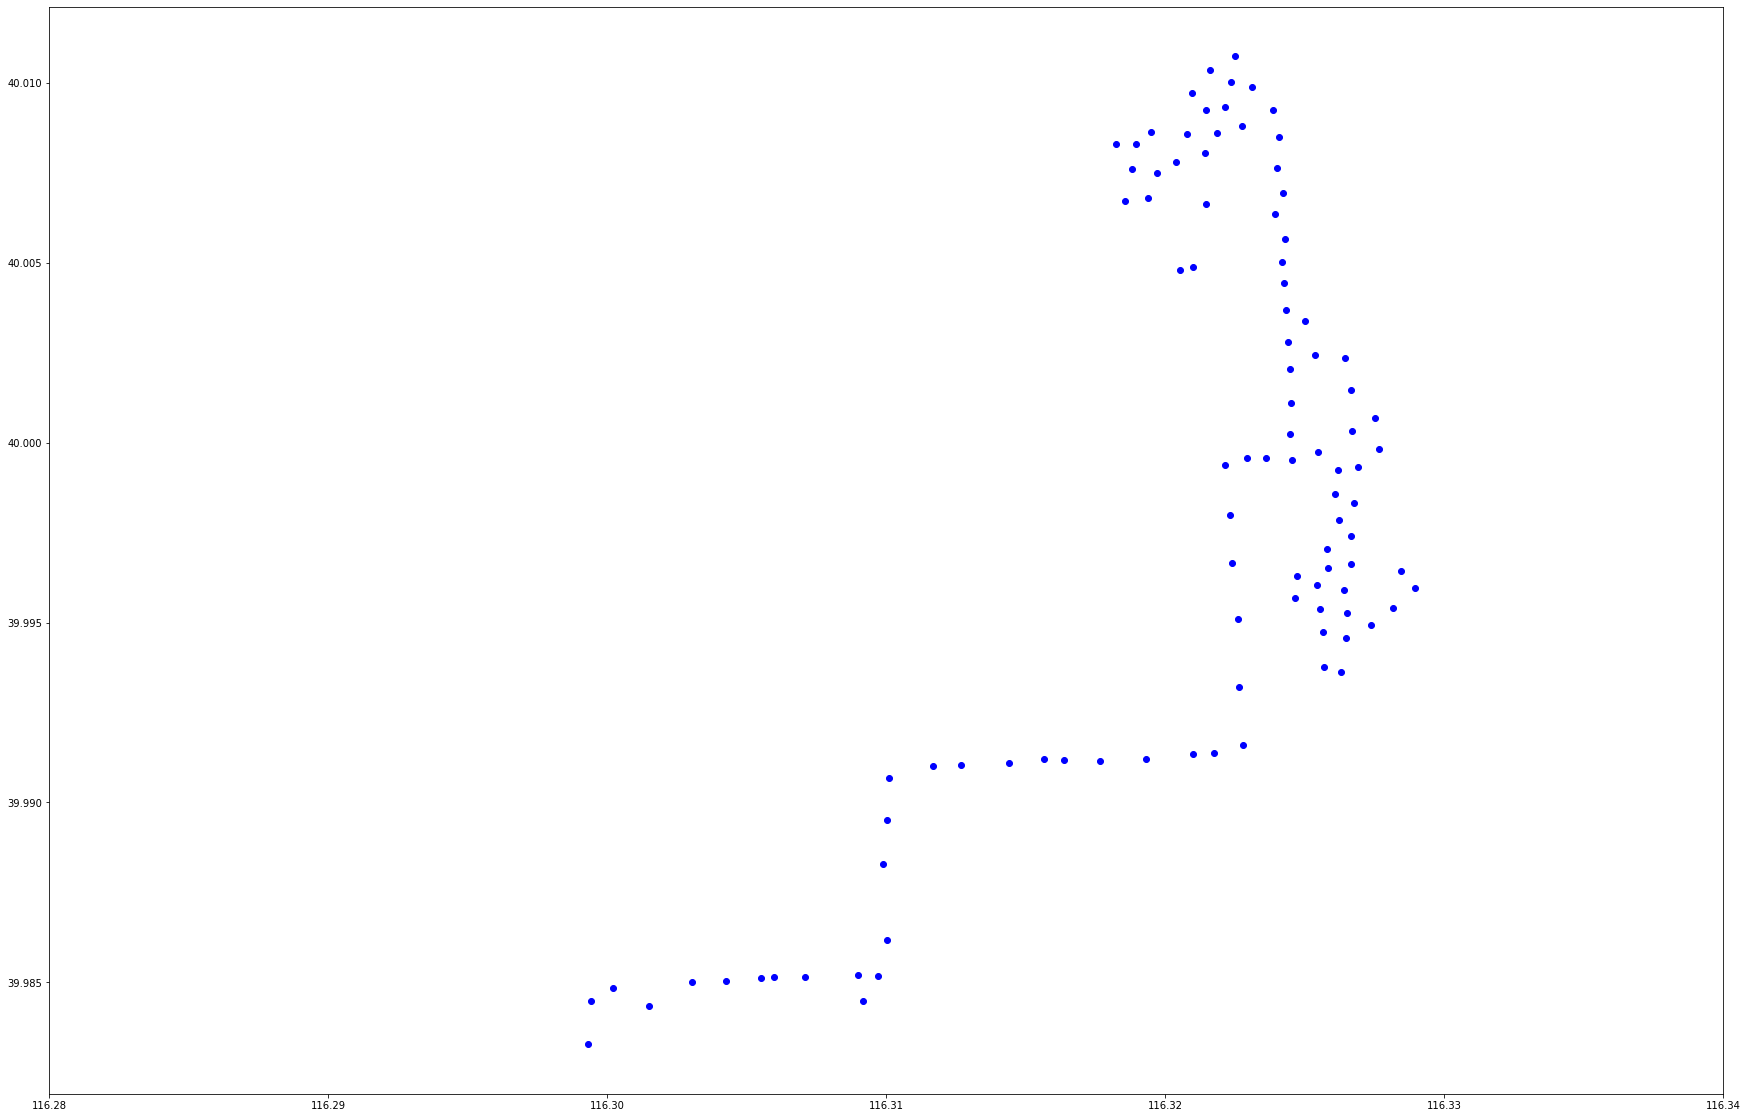

In [55]:
int_generator=interchange(prox)
int_samples=int_generator.run(point_set[:2000],100)
print(get_obj(int_samples,prox))

int_x=int_samples[:,0]
int_y=int_samples[:,1]
plot.figure(figsize=(30,20))
plot.xlim(116.28,116.34)
plot.scatter(int_x,int_y,c='b')

In [54]:
prox.epsilon

1.8988414569991985e-07

3.41


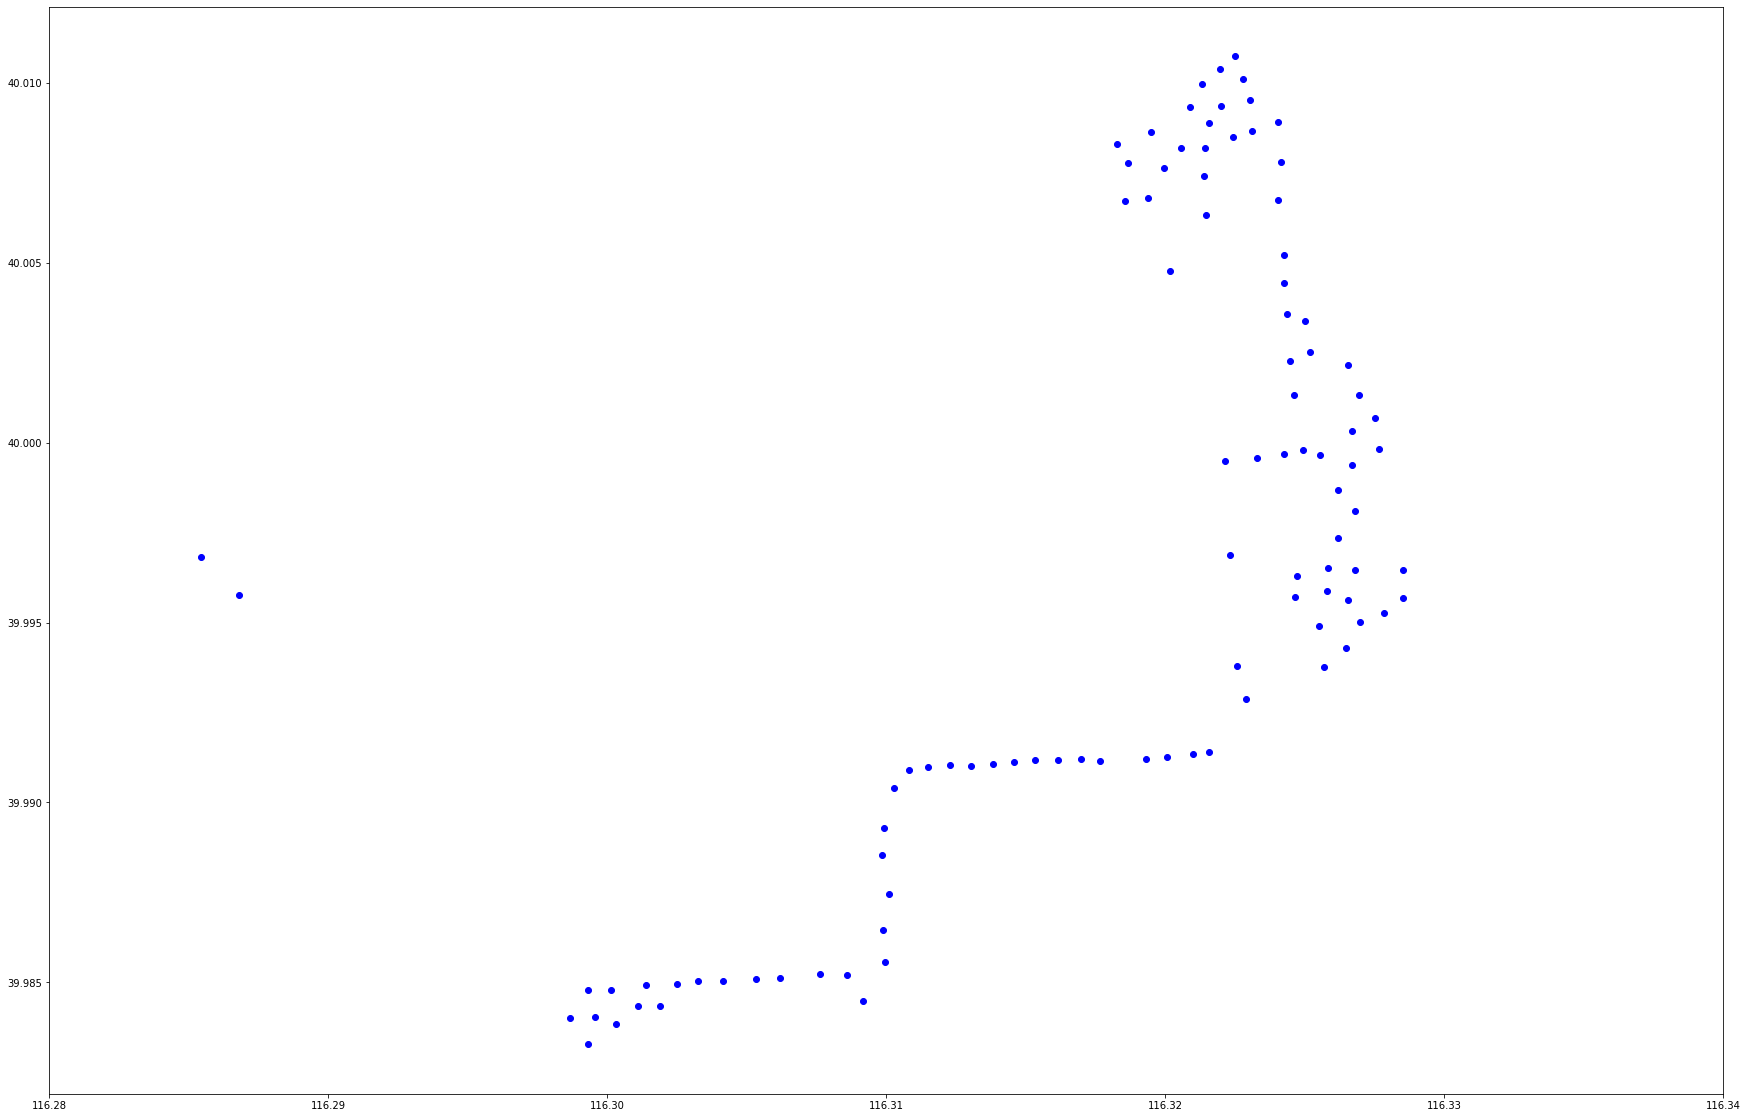

In [14]:
print(get_obj(int_samples,prox))

int_x=int_samples[:,0]
int_y=int_samples[:,1]
plot.figure(figsize=(30,20))
plot.xlim(116.28,116.34)
plot.scatter(int_x,int_y,c='b')

In [6]:
int_generator=interchange(prox)
int_samples=int_generator.run(point_set,sample_size)
print(get_obj(int_samples,sample_size))
idices=[]
for idx,point in enumerate(point_set):
    if point in int_samples:
        idices.append(idx)
print(idices)

4.13
[0, 1, 2, 6, 8, 12, 15, 17, 20, 27, 28]


In [8]:
prox=proximity([],set_eps=False)
# prox.epsilon=3.797682913998397e-07

3077.76


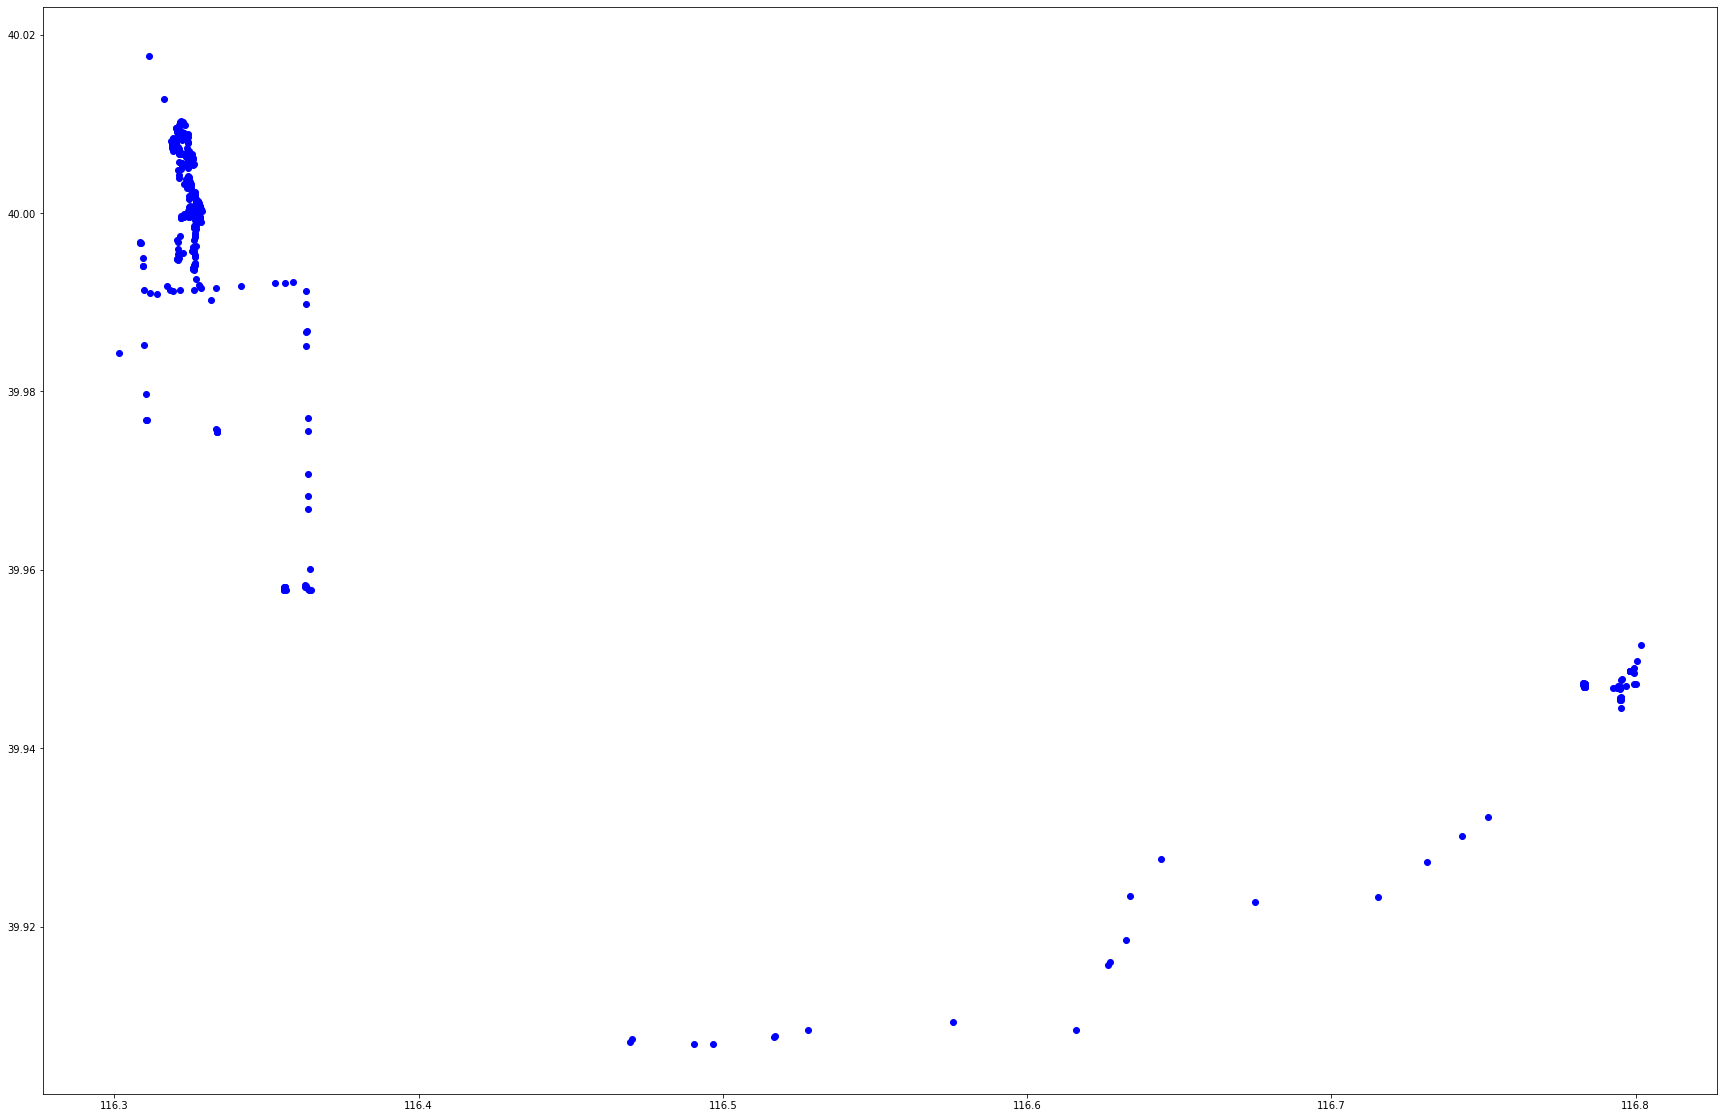

In [9]:
sample_size=500
stop=int(10e3)
rd_sample=ReservoirSample(point_set[:stop],sample_size)
print(get_obj(rd_sample,prox))
rd_x=rd_sample[:,0]
rd_y=rd_sample[:,1]
plot.figure(figsize=(30,20))
# plot.xlim(116.28,116.34)
plot.scatter(rd_x,rd_y,c='b')

116.31


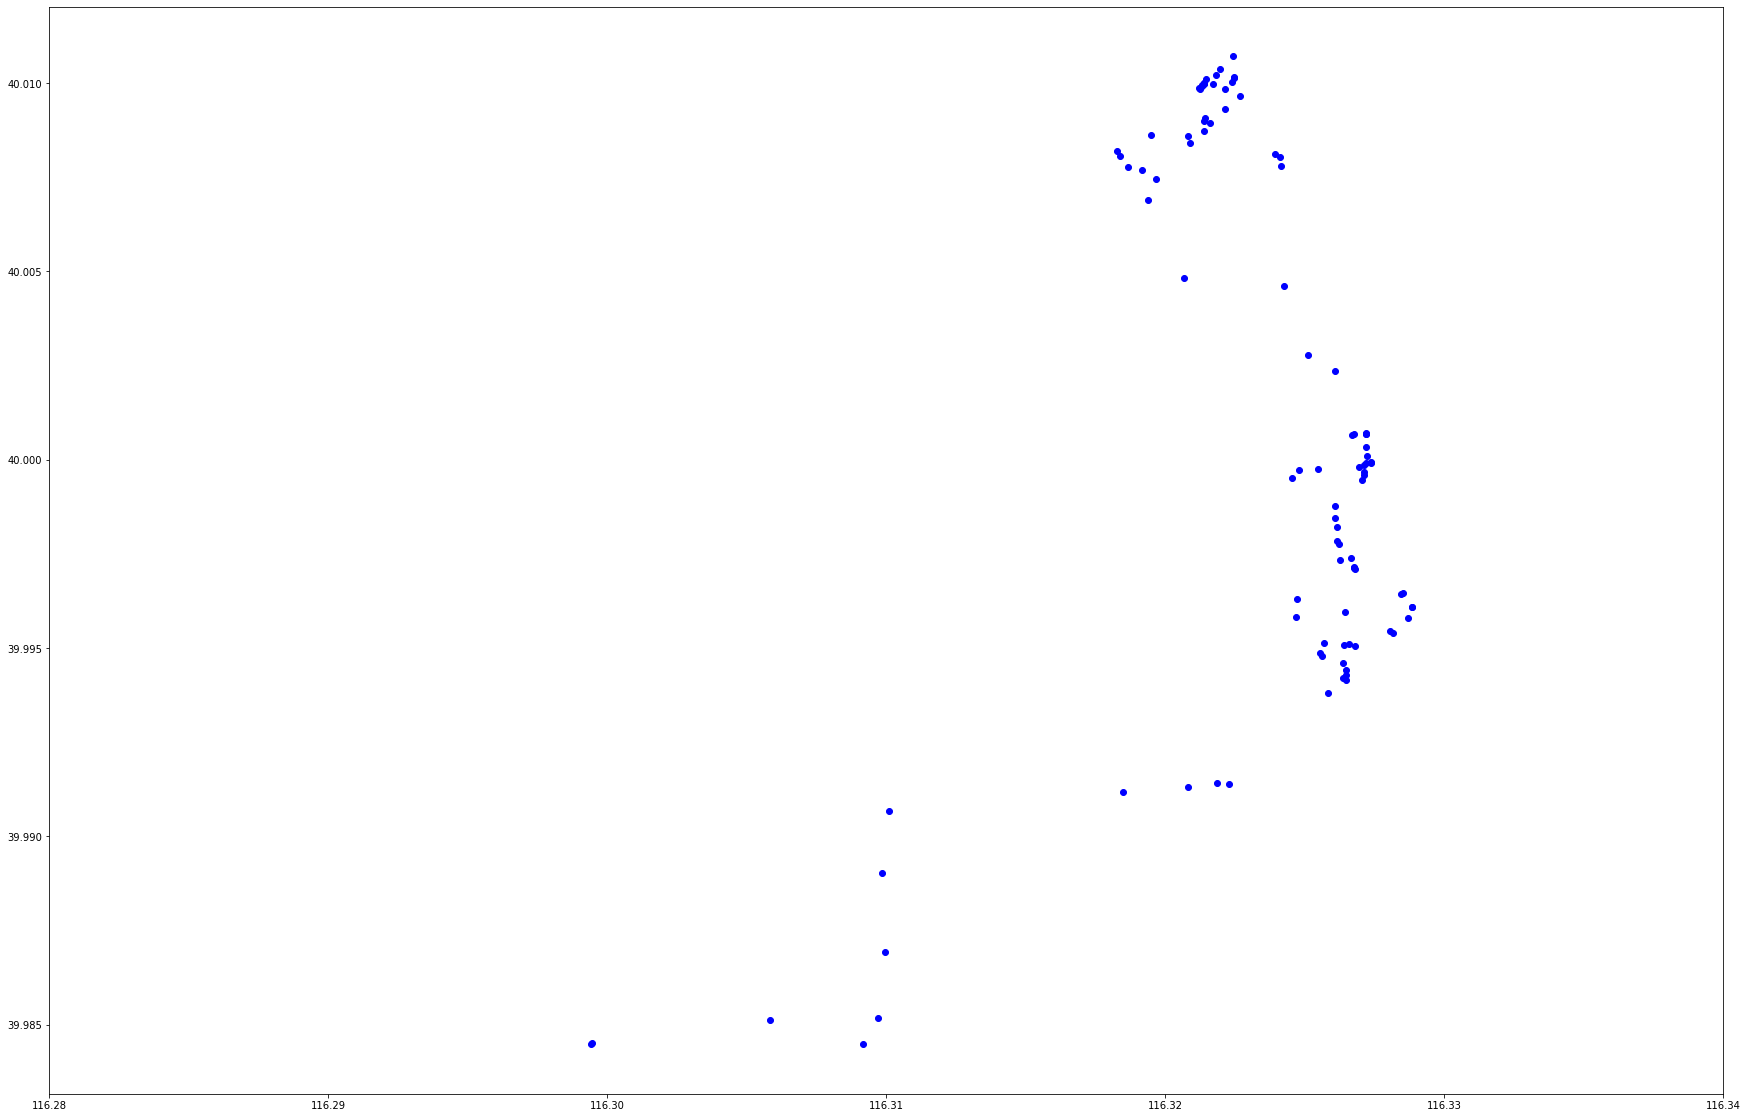

In [8]:
rd_sample=ReservoirSample(point_set[:2000],sample_size)
print(get_obj(rd_sample,prox))
rd_x=rd_sample[:,0]
rd_y=rd_sample[:,1]
plot.figure(figsize=(30,20))
plot.xlim(116.28,116.34)
plot.scatter(rd_x,rd_y,c='b')

157.14


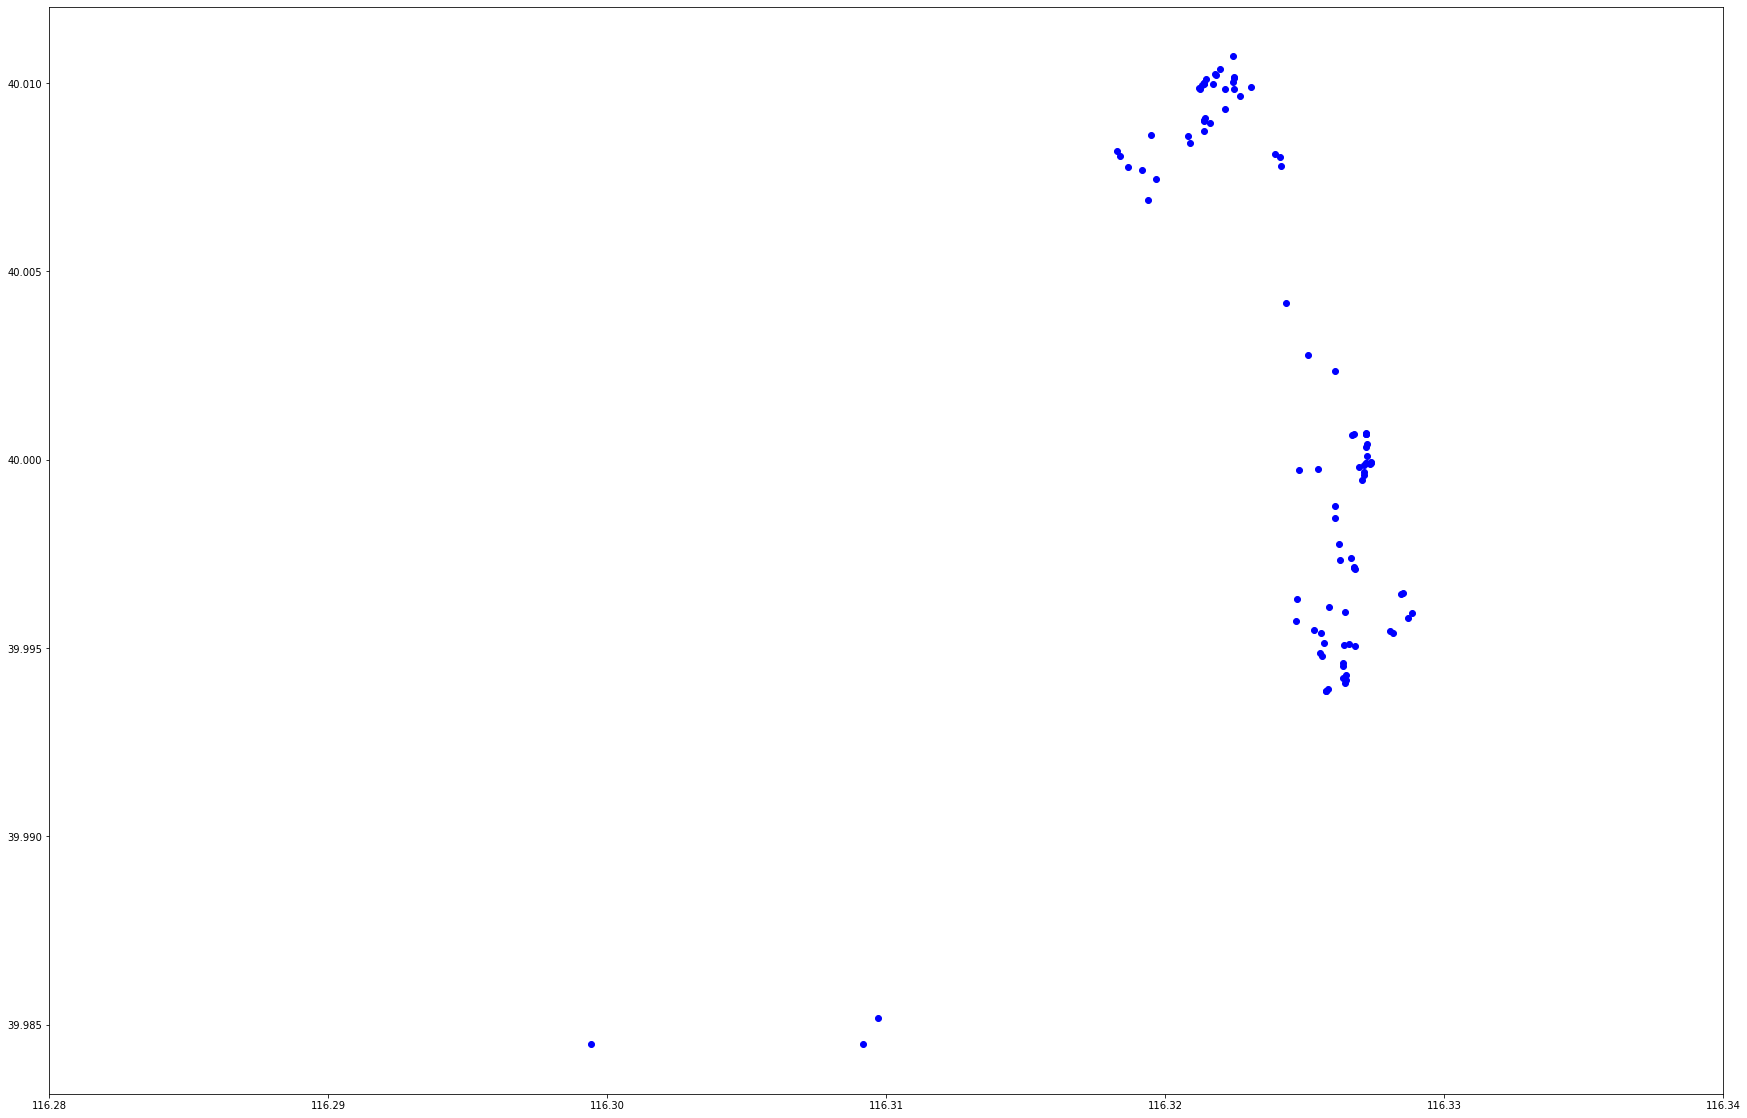

In [53]:
rd_sample=ReservoirSample(point_set[:2000],100)
print(get_obj(rd_sample,prox))
rd_x=rd_sample[:,0]
rd_y=rd_sample[:,1]
plot.figure(figsize=(30,20))
plot.xlim(116.28,116.34)
plot.scatter(rd_x,rd_y,c='b')

0.016539335250854492
2628.59


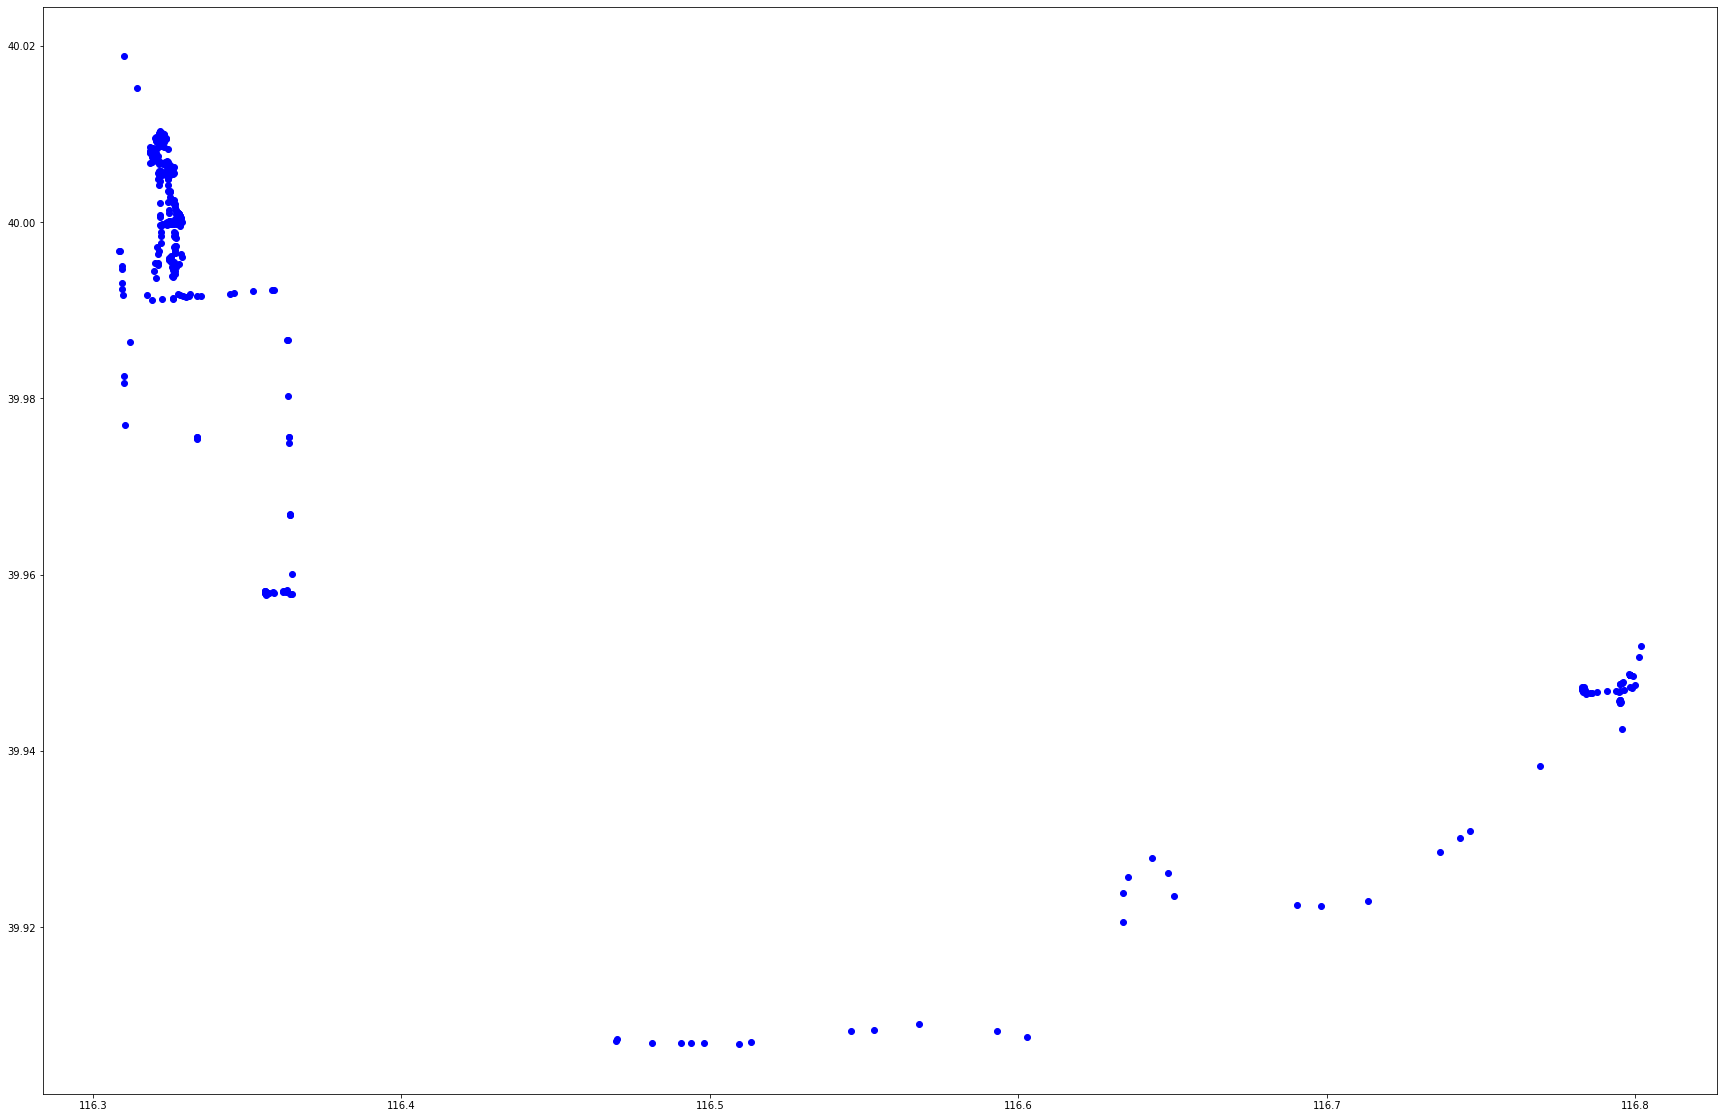

In [11]:
start=time()
st_sample=Stratified_sampling(point_set[:stop],sample_size,100)
print(time()-start)
print(get_obj(st_sample,prox))
st_x=st_sample[:,0]
st_y=st_sample[:,1]
plot.figure(figsize=(30,20))
# plot.xlim(116.28,116.34)
plot.scatter(st_x,st_y,c='b')

0.0034003257751464844
93.61


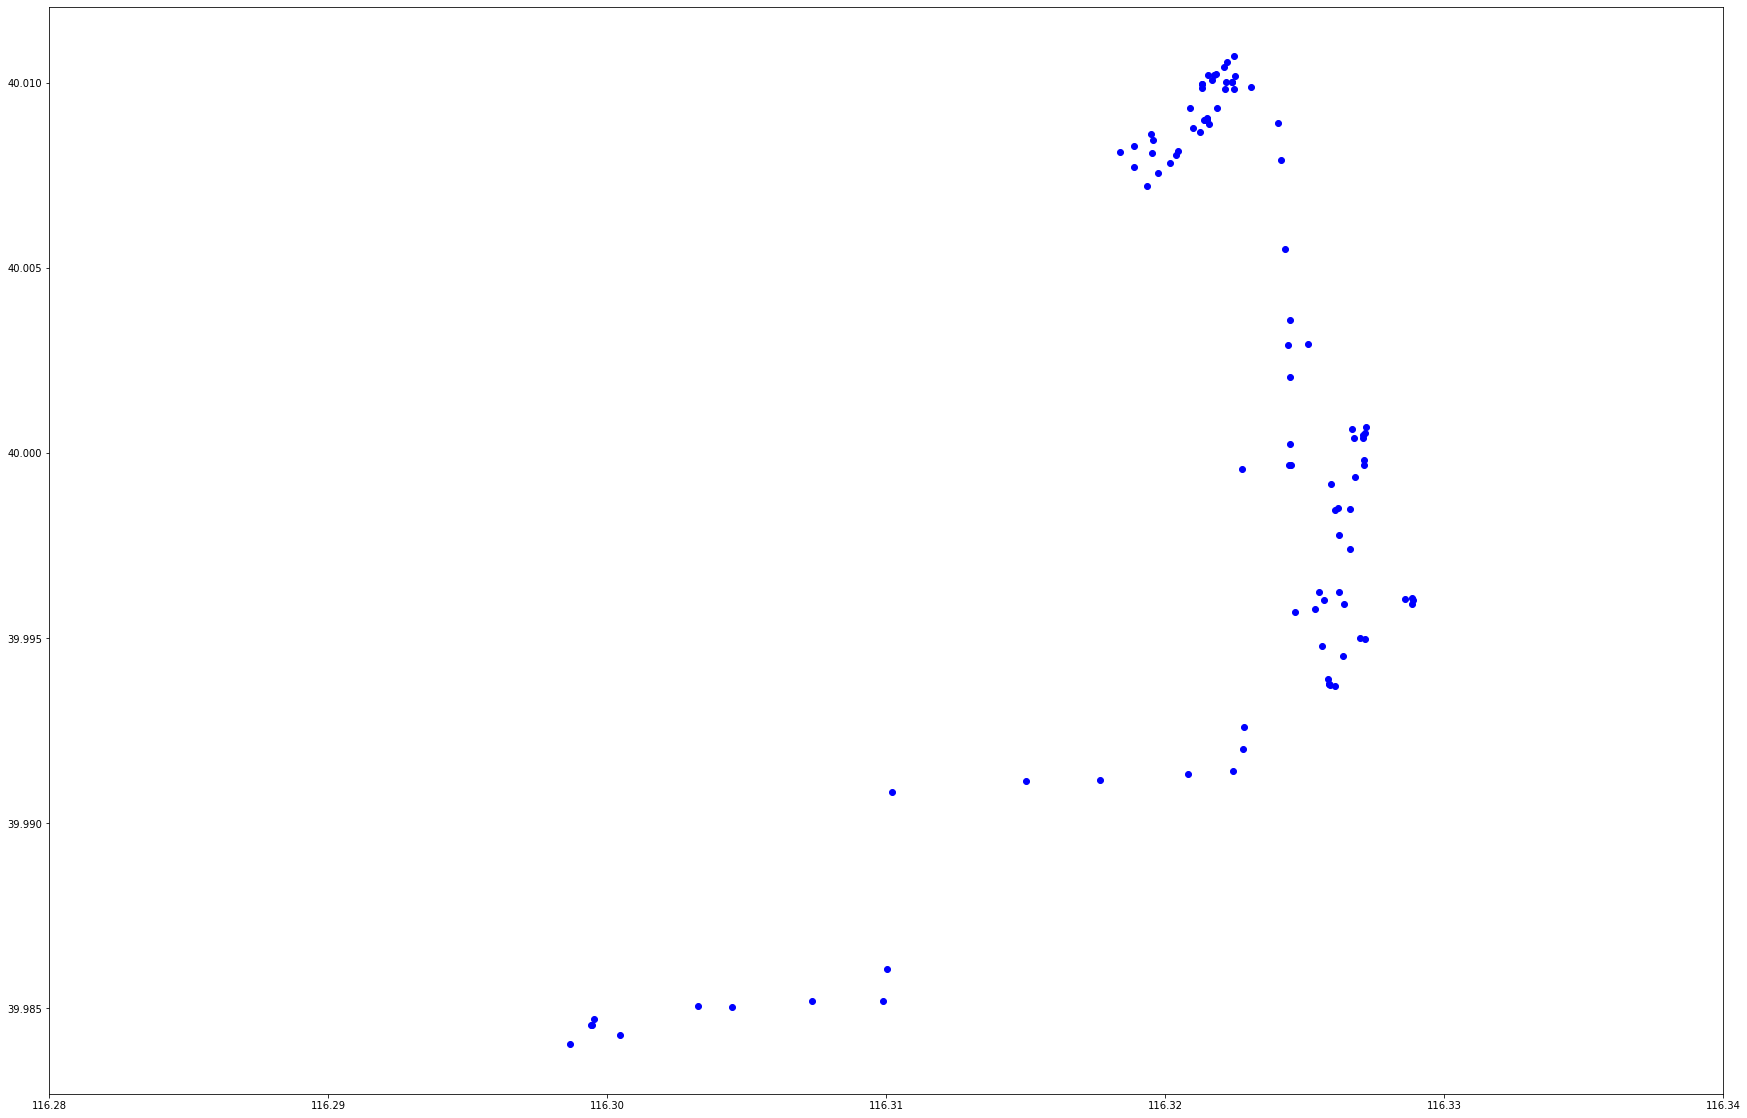

In [15]:
start=time()
st_sample=Stratified_sampling(point_set[:2000],sample_size,10)
print(time()-start)
print(get_obj(st_sample,prox))
st_x=st_sample[:,0]
st_y=st_sample[:,1]
plot.figure(figsize=(30,20))
plot.xlim(116.28,116.34)
plot.scatter(st_x,st_y,c='b')

0.004328012466430664
82.5


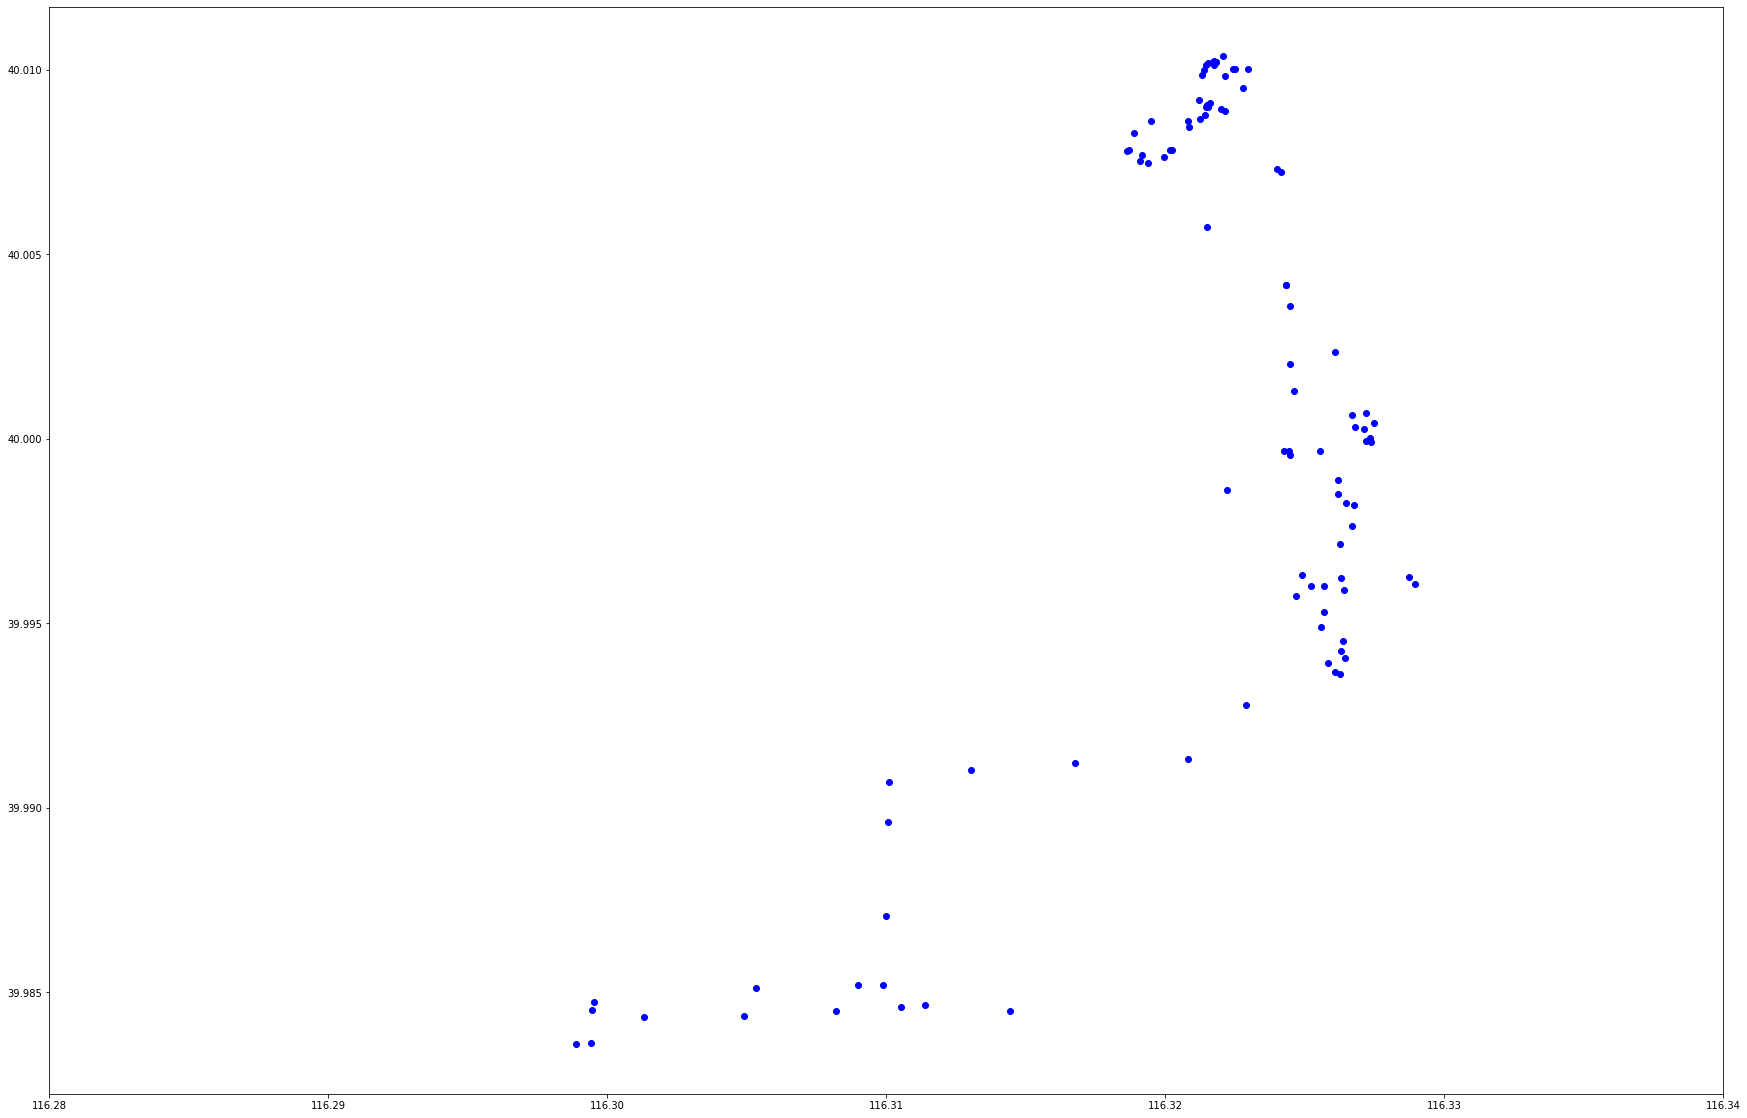

In [50]:
start=time.time()
st_sample=Stratified_sampling(point_set[:2000],100,100)
print(time.time()-start)
print(get_obj(st_sample,prox))
st_x=st_sample[:,0]
st_y=st_sample[:,1]
plot.figure(figsize=(30,20))
plot.xlim(116.28,116.34)
plot.scatter(st_x,st_y,c='b')

In [5]:
ilp_samples=ilp(point_set,3)
print(get_loss(ilp_samples,3))
# ilp_x=ilp_samples[:,0]
# ilp_y=ilp_samples[:,1]
# plot.scatter(ilp_x,ilp_y,c='b')

11 55
optimal
0.3301709058221377


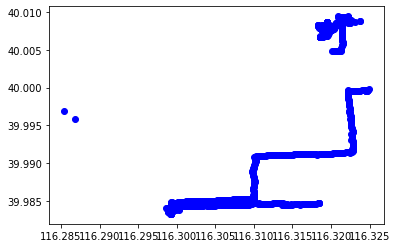

In [10]:
x=df.loc[:,['Longitude']].values.tolist()
y=df.loc[:,['Latitude']].values.tolist()
plot.scatter(x,y,c='b')

In [7]:
int_samples=interchange(point_set,3)
print(get_loss(int_samples,3))
# int_x=samples[:,0]
# int_y=samples[:,1]
# plot.scatter(int_x,int_y,c='b')

0.3301709058221377


In [8]:
rd_sample=ReservoirSample(point_set,3)
print(get_loss(rd_sample,3))

# rd_x=rd_sample[:,0]
# rd_y=rd_sample[:,1]
# plot.scatter(rd_x,rd_y,c='b')


2.091878246367592


In [9]:
st_sample=Stratified_sampling(point_set,3,5)
print(get_loss(st_sample,3))
# st_x=st_sample[:,0]
# st_y=st_sample[:,1]
# plot.scatter(st_x,st_y,c='b')


IndexError: index 2 is out of bounds for axis 0 with size 2